##**算每一個log參數的AVG,STD**#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip txtfile in colab
!pip install zipfile
import os
import zipfile
#解壓縮要放到哪個目錄
url = '/content/vm4/'
# zipfile example
def zip_list(file_path):
    zf = zipfile.ZipFile(file_path, 'r')
    zf.extractall(url)


if __name__ == '__main__':
    #壓縮檔位置
    file_path = '/content/drive/MyDrive/cloud gaming QoE prediction/data/vm4_txt.zip'
    zip_list(file_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
b = os.listdir(r"/content/vm1/")
b.sort(key = lambda x:x.split('.')[0][16:50].replace('_','').replace('(','').replace(')','').replace('-',''))

In [ ]:
! pip install nums_from_string

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#算每一個log參數的AVG,STD(修正版)
#num test
#使用 get_nums() 函數
# 載入現成套件

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import nums_from_string as nfs

def network(file):
  Path = "/content/vm1/"
  df = pd.read_csv(Path + file ,delimiter="\t",names=['data']) #將資料變成dataframe
  # Path = "/content/"
  # df = pd.read_csv(Path + file,delimiter="\t",names=['data']) #將資料變成dataframe
  df[['ping', 'server', 'client','link','packetloss']] = df.data.str.split(',', expand=True)

  #把data丟掉
  data2 = df.drop(labels=['data'],axis='columns')
  #顯示出NETWORK開頭的資料
  net_sta2=data2[data2.ping.str.startswith('NETWORK')]

  net_sta2.reset_index(inplace=True, drop=True)


  ping_list = []
  server_list = []
  client_list = []
  link_list = []
  packetloss_list = []
  for i in range(len(net_sta2)):
    ping = net_sta2.iloc[i, 0]
    ping_new = nfs.get_nums(ping)
    #多個list轉在一起
    ping_num = [str(integer) for integer in ping_new]
    ping_nums = float("".join(ping_num))
    ping_list.append(ping_nums)

    server = net_sta2.iloc[i, 1]
    server_new = nfs.get_nums(server)
    server_num = [str(integer) for integer in server_new]
    server_nums = float("".join(server_num))
    server_list.append(server_nums)

    client = net_sta2.iloc[i, 2]
    client_new = nfs.get_nums(client)
    client_num = [str(integer) for integer in client_new]
    client_nums = float("".join(client_num))
    client_list.append(client_nums)


    link = net_sta2.iloc[i, 3]
    link_new = nfs.get_nums(link)
    link_num = [str(integer) for integer in link_new]
    link_nums = float("".join(link_num))
    link_list.append(link_nums)

    packetloss = net_sta2.iloc[i, 4]
    packetloss_new = nfs.get_nums(packetloss)
    packetloss_num = [str(integer) for integer in packetloss_new]
    packetloss_nums = float("".join(packetloss_num))
    packetloss_list.append(packetloss_nums)


  net_sta2.insert(5, 'ping_new', ping_list)
  net_sta2.insert(6, 'server_new', server_list)
  net_sta2.insert(7, 'client_new', client_list)
  net_sta2.insert(8, 'link_new', link_list)
  net_sta2.insert(9, 'packetloss_new', packetloss_list)
  net= net_sta2.drop(labels=['ping','server','client','link','packetloss'],axis='columns')

  #all frame data
  #抓frameage的資料
  frameage = pd.DataFrame(columns = ["frameage", "framesize", "cap_time", "con_time","Encode_time", "transfer_time", "Decode_time","Upload_time", "complete_time"])
  total = "total"
  loc=df[df['data'].str.contains(total, na=False)]
  t =loc.data.str.split(':', expand=True).pop(1)
  age=t.str.split('ms', expand=True).pop(0)
  frameage['frameage']=age
  frameage.reset_index(inplace=True, drop=True)
  #framesize
  str_choice = "Frame:"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  Frame=loc.data.str.split(',', expand=True).pop(1)
  framesize=Frame.str.split('bytes', expand=True).pop(0)
  framesize.reset_index(inplace=True, drop=True)
  frameage['framesize']=framesize
  #cap_time
  str_choice = "CaptureEnd"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  cap=loc.data.str.split('delta:', expand=True).pop(1)
  Capture=cap.str.split('ms', expand=True).pop(0)
  Capture.reset_index(inplace=True, drop=True)
  frameage['cap_time']=Capture
  #con_time
  str_choice = "ConvertEnd"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  con=loc.data.str.split('delta:', expand=True).pop(1)
  Convert=con.str.split('ms', expand=True).pop(0)
  Convert.reset_index(inplace=True, drop=True)
  frameage['con_time']=Convert
  #Encode_time
  str_choice = "EncodeEnd"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  Encode=loc.data.str.split('delta:', expand=True).pop(1)
  EncodeEnd=Encode.str.split('ms', expand=True).pop(0)
  EncodeEnd.reset_index(inplace=True, drop=True)
  frameage['Encode_time']=EncodeEnd
  #transfer_time
  str_choice = "EventRecv"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  Event=loc.data.str.split('delta:', expand=True).pop(1)
  EventRecv=Event.str.split('ms', expand=True).pop(0)
  EventRecv.reset_index(inplace=True, drop=True)
  frameage['transfer_time']=EventRecv

  #upload_time
  str_choice = "UploadEnd"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  Upload=loc.data.str.split('delta:', expand=True).pop(1)
  Upload=Upload.str.split('ms', expand=True).pop(0)
  Upload.reset_index(inplace=True, drop=True)
  frameage['Upload_time']=Upload
  #Decode_time
  str_choice = "DecodeEnd"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  Decode=loc.data.str.split('delta:', expand=True).pop(1)
  DecodeEnd=Decode.str.split('ms', expand=True).pop(0)
  DecodeEnd.reset_index(inplace=True, drop=True)
  frameage['Decode_time']=DecodeEnd

  #complete_time
  str_choice = "EventComplete"
  loc=df[df['data'].str.contains(str_choice, na=False)]
  Complete=loc.data.str.split('delta:', expand=True).pop(1)
  complete_time=Complete.str.split('ms', expand=True).pop(0)
  complete_time.reset_index(inplace=True, drop=True)
  frameage['complete_time']=complete_time
  #轉成float
  frameage['frameage'] = pd.to_numeric(frameage ['frameage'], errors='coerce')
  frameage['framesize'] = pd.to_numeric(frameage ['framesize'], errors='coerce')
  frameage['cap_time'] = pd.to_numeric(frameage ['cap_time'], errors='coerce')
  frameage['con_time'] = pd.to_numeric(frameage ['con_time'], errors='coerce')
  frameage['Encode_time'] = pd.to_numeric(frameage ['Encode_time'], errors='coerce')
  frameage['transfer_time'] = pd.to_numeric(frameage ['transfer_time'], errors='coerce')
  frameage['Decode_time'] = pd.to_numeric(frameage ['Decode_time'], errors='coerce')
  frameage['Upload_time'] = pd.to_numeric(frameage ['Upload_time'], errors='coerce')
  frameage['complete_time'] = pd.to_numeric(frameage ['complete_time'], errors='coerce')
  frameage=frameage.fillna(0)

  alldata=net.join(frameage, how='left')
  qos = {'Avg.ping Time':alldata['ping_new'].mean(), "st.Dev.ping Time": alldata['ping_new'].std(),
          'Avg.serverBW':alldata['server_new'].mean(), "St.Dev.serverBW": alldata['server_new'].std(),
          'Avg.clientBW':alldata['client_new'].mean(), "St.Dev.clientBW": alldata['client_new'].std(),
          'Avg.linkBW':alldata['link_new'].mean(), "St.Dev.linkBW": alldata['link_new'].std(),
          'Avg.packetloss':alldata['packetloss_new'].mean(), "St.Dev.packetloss": alldata['packetloss_new'].std(),
          'Avg.FrameAge':alldata['frameage'].mean(), "st.Dev.FrameAge": alldata['frameage'].std(),
          'Avg.FrameSize':alldata['framesize'].mean(), "st.Dev.FrameSize": alldata['framesize'].std(),
          'Avg.CaptureTime':alldata['cap_time'].mean(), "st.Dev.CaptureTime": alldata['cap_time'].std(),
          'Avg.ConvertTime':alldata['con_time'].mean(), "st.Dev.ConvertTime": alldata['con_time'].std(),
          'Avg.EncodeTime':alldata['Encode_time'].mean(), "st.Dev.EncodeTime": alldata['Encode_time'].std(),
          'Avg.TransferTime':alldata['transfer_time'].mean(), "st.Dev.TransferTime": alldata['transfer_time'].std(),
          'Avg.DecodeTime':alldata['Decode_time'].mean(), "st.Dev.DecodeTime": alldata['Decode_time'].std(),
          'Avg.UploadTime':alldata['Upload_time'].mean(), "st.Dev.UploadTime": alldata['Upload_time'].std(),
          'Avg.CompleteTime':alldata['complete_time'].mean(), "st.Dev.CompleteTime": alldata['complete_time'].std()
          }
  sts_cor_qos = pd.DataFrame(qos, index = [0])
  sts_cor_qos=sts_cor_qos.round(3)
  return sts_cor_qos

In [ ]:
#txt
x = pd.DataFrame()
b = os.listdir(r"/content/vm1")
b.sort(key = lambda x:x.split('.')[0][16:50].replace('_','').replace('(','').replace(')','').replace('-',''))

for i in b:
  try:
    df = network(f"{i}")
    df["file"] = i
    x = x.append(df)
  except:
    print(f"error with the file-{i}")
    pass


x

<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The

error with the file-Engine_Evolution_2022_(1871990)_10-16-22_07-57-55_StreamVideoTrace.txt
error with the file-Engine_Evolution_2022_(1871990)_10-16-22_07-58-00_StreamVideoTrace.txt


<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The

error with the file-Engine_Evolution_2022_(1871990)_10-17-22_03-11-13_StreamVideoTrace.txt


Streaming output truncated to the last 5000 lines.
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipython-input-155-af20285c29b3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df)
<ipy

,Avg.ping Time,st.Dev.ping Time,Avg.serverBW,St.Dev.serverBW,Avg.clientBW,St.Dev.clientBW,Avg.linkBW,St.Dev.linkBW,Avg.packetloss,St.Dev.packetloss,...,st.Dev.EncodeTime,Avg.TransferTime,st.Dev.TransferTime,Avg.DecodeTime,st.Dev.DecodeTime,Avg.UploadTime,st.Dev.UploadTime,Avg.CompleteTime,st.Dev.CompleteTime,file
0,184.049,7.373,691.849,447.852,140.189,15.887,86832.585,34077.419,0.000,0.000,...,0.409,89.638,4.351,3.535,2.936,0.569,0.236,13.262,4.210,Engine_Evolution_2022_(1871990)_10-15-22_10-42...
0,178.352,1.107,882.562,514.737,485.906,1105.060,65751.312,48078.587,0.000,0.000,...,0.444,88.106,2.478,0.342,0.175,0.412,0.217,6.416,2.743,Engine_Evolution_2022_(1871990)_10-15-22_10-42...
0,179.867,0.774,2410.469,1247.422,2754.719,1928.042,3545.812,17601.045,0.000,0.000,...,5.014,89.324,2.449,6.155,4.059,0.539,0.204,12.428,6.560,Engine_Evolution_2022_(1871990)_10-15-22_10-42...
0,180.328,0.321,3219.385,1509.470,4015.692,1181.064,474.923,13.954,0.000,0.000,...,3.219,90.526,2.523,0.912,2.998,0.345,0.124,12.531,37.641,Engine_Evolution_2022_(1871990)_10-15-22_10-43...
0,180.328,0.321,3219.385,1509.470,4015.692,1181.064,474.923,13.954,0.000,0.000,...,3.219,90.526,2.523,0.912,2.998,0.345,0.124,12.531,37.641,Engine_Evolution_2022_(1871990)_10-15-22_10-43...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,37.657,0.161,14871.852,30.149,2674.185,1861.567,9127.000,0.000,0.036,0.056,...,0.369,22.254,7.490,6.810,4.353,0.501,1.065,14.402,4.133,Engine_Evolution_2022_(1871990)_11-16-22_10-25...
0,37.684,0.156,14854.692,90.708,2505.462,1896.923,9127.000,0.000,0.000,0.000,...,0.485,22.292,7.317,1.961,3.311,0.534,1.095,14.805,4.248,Engine_Evolution_2022_(1871990)_11-16-22_10-25...
0,37.521,0.260,14736.250,51.904,1843.562,1930.149,9127.000,0.000,0.000,0.000,...,0.364,22.011,6.612,1.256,1.102,0.339,0.096,14.528,4.381,Engine_Evolution_2022_(1871990)_11-16-22_10-25...
0,222.324,141.714,5880.259,445.286,1267.222,1424.978,5504.630,2307.325,19.489,19.760,...,0.669,50.280,61.516,7.781,2.960,0.536,0.104,153.755,124.148,Engine_Evolution_2022_(1871990)_11-16-22_10-25...


In [ ]:
len(b)

3202

In [ ]:
x.head()

,Avg.ping Time,st.Dev.ping Time,Avg.serverBW,St.Dev.serverBW,Avg.clientBW,St.Dev.clientBW,Avg.linkBW,St.Dev.linkBW,Avg.packetloss,St.Dev.packetloss,...,st.Dev.EncodeTime,Avg.TransferTime,st.Dev.TransferTime,Avg.DecodeTime,st.Dev.DecodeTime,Avg.UploadTime,st.Dev.UploadTime,Avg.CompleteTime,st.Dev.CompleteTime,file
0,184.049,7.373,691.849,447.852,140.189,15.887,86832.585,34077.419,0.0,0.0,...,0.409,89.638,4.351,3.535,2.936,0.569,0.236,13.262,4.210,Engine_Evolution_2022_(1871990)_10-15-22_10-42...
0,178.352,1.107,882.562,514.737,485.906,1105.060,65751.312,48078.587,0.0,0.0,...,0.444,88.106,2.478,0.342,0.175,0.412,0.217,6.416,2.743,Engine_Evolution_2022_(1871990)_10-15-22_10-42...
0,179.867,0.774,2410.469,1247.422,2754.719,1928.042,3545.812,17601.045,0.0,0.0,...,5.014,89.324,2.449,6.155,4.059,0.539,0.204,12.428,6.560,Engine_Evolution_2022_(1871990)_10-15-22_10-42...
0,180.328,0.321,3219.385,1509.470,4015.692,1181.064,474.923,13.954,0.0,0.0,...,3.219,90.526,2.523,0.912,2.998,0.345,0.124,12.531,37.641,Engine_Evolution_2022_(1871990)_10-15-22_10-43...
0,180.328,0.321,3219.385,1509.470,4015.692,1181.064,474.923,13.954,0.0,0.0,...,3.219,90.526,2.523,0.912,2.998,0.345,0.124,12.531,37.641,Engine_Evolution_2022_(1871990)_10-15-22_10-43...


In [ ]:
# x.reset_index(inplace=True)
# x

## **mapping**

In [ ]:
#匯入受試者體驗時間對照表
datatime = pd.read_csv('/content/drive/MyDrive/cloud gaming QoE prediction/data/time2.csv')
datatime["starttime_new"] = pd.to_datetime(datatime["starttime_new"])
datatime["endtime_new"] = pd.to_datetime(datatime["endtime_new"])

In [ ]:
datatime=datatime.drop(labels=['Unnamed: 0'],axis='columns') #刪除欄位

In [ ]:
#抓第一個位置
datatime = datatime[datatime['seat']==1.0]
# datatime2 = datatime[datatime['seat']==2.0]
# datatime3 = datatime[datatime['seat']==3.0]
# datatime4 = datatime[datatime['seat']==4.0]
datatime.reset_index(inplace=True)


datatime

In [ ]:
#seat1=21
#seat2=22
#seat3=17
#seat4=21
#tota=81
21+22+17+21

81

In [ ]:
#列出vm1裏所有檔案
b = os.listdir("/content/vm1")
#排列檔案順序
b.sort(key = lambda x:x.split('.')[0][16:50].replace('_','').replace('(','').replace(')','').replace('-',''))

In [ ]:
#把datetime的欄位
import time,datetime
r = datetime.datetime.strptime(b[5][32:37]+'-2022-'+b[5][41:49],"%m-%d-%Y-%H-%M-%S")
r

datetime.datetime(2022, 10, 15, 10, 43, 8)

In [ ]:
#抓出所有受試者的所有log檔
# 2-6位受試者沒有資料
import time,datetime
w=0
player_log = pd.DataFrame()
# for i in range():
for i in b:
  for t in range(0,21):
    try:
    # t = 1
      r = datetime.datetime.strptime(i[32:37]+'-2022-'+i[41:49],"%m-%d-%Y-%H-%M-%S")
      if datatime['starttime_new'][t]<r and datatime['endtime_new'][t]>r:
        # print(i)
        temp_dict = {"user":datatime['name'][t],"file":i}
        df_temp = pd.DataFrame(temp_dict,index = [0])
        player_log = player_log.append(df_temp)

        w+=1
    except:
      print(f"error with the file-{i}")
      pass


player_log



In [ ]:
#時間表＋使用者
len(player_log['user'].unique())

21

In [ ]:
21-13

8

## 受試者+log+x

In [ ]:
all=pd.merge(player_log, x, on='file')
# all.to_csv('seat1_txt.csv')


In [ ]:
len(all.user.unique())

13

In [ ]:
len(b)

3202

In [ ]:
import pandas as pd
seat_df_list = []

for i in range(1,5):
    seat_df = pd.read_csv(f"/content/seat{i}_txt.csv")
    seat_df['position'] = i
    seat_df_list.append(seat_df)
seat_df = pd.concat(seat_df_list,ignore_index=True)

seat_df = seat_df.drop(['Unnamed: 0'],axis=1)
seat_df

In [ ]:
len(seat_df.user.unique())

60

In [ ]:
seat3 = pd.read_csv("/content/seat3_txt.csv")
len(seat3.user.unique())
#seat1=21
#seat2=22
#seat3=17
#seat4=21
#21+22+17+21

17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
seat1 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat1_txt.csv")
seat2 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat2_txt.csv")
seat3 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat3_txt.csv")
seat4 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat4_txt.csv")


In [ ]:
name=seat4.user.unique()
len(name)


21

In [ ]:
#去掉frame<60的人
w=0
for i in range(0,21):
  name=seat4.user.unique()[i]
  user = seat4[seat4['user'].isin([name])]
  if len(user)>60:
    print(name)
    w+=1


w

In [ ]:
#單一個人分十回合
mos=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/expand_mos.csv")
user = mos[mos['username'].isin(['許人婕'])]
user

,Unnamed: 0,time,position,username,round,Status,Graphic,Interactive,SelfAssessment,Opinion,latency,packet_loss,bandwidth
570,570,2022/11/4 上午 11:50:11,3,許人婕,0,無,5,6,4,5,0,0,0
571,571,2022/11/4 上午 11:50:11,3,許人婕,1,無,1,5,3,4,0,0,1920
572,572,2022/11/4 上午 11:50:11,3,許人婕,2,無,6,2,6,4,0,20,0
573,573,2022/11/4 上午 11:50:11,3,許人婕,3,無,2,1,1,1,200,0,0
574,574,2022/11/4 上午 11:50:11,3,許人婕,4,無,6,6,5,6,0,0,2560
575,575,2022/11/4 上午 11:50:11,3,許人婕,5,無,3,4,4,5,0,15,0
576,576,2022/11/4 上午 11:50:11,3,許人婕,6,無,2,4,6,5,0,0,32000
577,577,2022/11/4 上午 11:50:11,3,許人婕,7,無,3,1,1,2,100,0,0
578,578,2022/11/4 上午 11:50:11,3,許人婕,8,無,6,1,2,4,0,25,0
579,579,2022/11/4 上午 11:50:11,3,許人婕,9,無,2,6,6,5,30,0,0


In [ ]:
a = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.ping Time']-param.sum(),2))]
b = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.packetloss']-param.sum(),2))]
c = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.serverBW']-param.sum(),2))]

In [ ]:
#single argmin
#0:Graphic 1:Interactive	2:SelfAssessment 3:Opinion	4:latency	5:packet_loss	5:bandwidth
import numpy as np
import pandas as pd
round=[]
result = pd.DataFrame()
col=['latency','packet_loss','bandwidth']

for user in seat3.user.unique():
  if user != '許人婕':
    continue
  parameters=mos[mos.username==user]
  for setting in parameters.values:
    param=np.array(setting[-3:])
    # print(param)
    if sum(param)==0:
      continue
    if col[np.where(param>0)[0][0]]=='latency':
      # np.argmin(np.power(seat3[seat3.user==user]['Avg.pingTime']-param.sum(),2))
      # print(seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.pingTime']-param.sum(),2))])
      #相差取平方
      a = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.ping Time']-param.sum(),2))]
      a = pd.concat([a, pd.Series(np.array(setting[-7:]))])

      # s3= ping.T
    elif col[np.where(param>0)[0][0]]=='packet_loss':
      # print(seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.packetloss']-param.sum(),2))])
      b = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.packetloss']-param.sum(),2))]
      b = pd.concat([b, pd.Series(np.array(setting[-7:]))])
      # print(b)

    elif col[np.where(param>0)[0][0]]=='bandwidth':
      # print(seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.serverBW']-param.sum(),2))])
      c = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.serverBW']-param.sum(),2))]
      c = pd.concat([c, pd.Series(np.array(setting[-7:]))])
      # print(c)
  output = pd.concat([a, b, c], axis =1)
  d = output.T

  result = result.append(d)
result = result.drop_duplicates()

result

<ipython-input-70-893bfd771f61>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(d)


,Unnamed: 0,user,file,Avg.ping Time,st.Dev.ping Time,Avg.serverBW,St.Dev.serverBW,Avg.clientBW,St.Dev.clientBW,Avg.linkBW,...,st.Dev.UploadTime,Avg.CompleteTime,st.Dev.CompleteTime,0,1,2,3,4,5,6
0,606,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-31-10,25.348,32.374,2476.5,3188.876,749.966,989.643,65412.0,...,0.256,13.692,22.048,2,6,6,5,30,0,0
1,570,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-18-10,3.765,0.109,13452.321,1028.932,142.214,16.204,6997.107,...,1.42,7.385,7.363,6,1,2,4,0,25,0
2,573,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-18-44,6.34,2.542,15690.4,411.985,2287.057,2055.805,6899.943,...,1.513,6.813,6.535,2,4,6,5,0,0,32000


# CNN

In [ ]:
cnn2=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/cnn2.csv")

cnn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5226 non-null   int64 
 1   file        5226 non-null   object
 2   category    5226 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 122.6+ KB


In [ ]:
a=cnn2.iloc[:100]

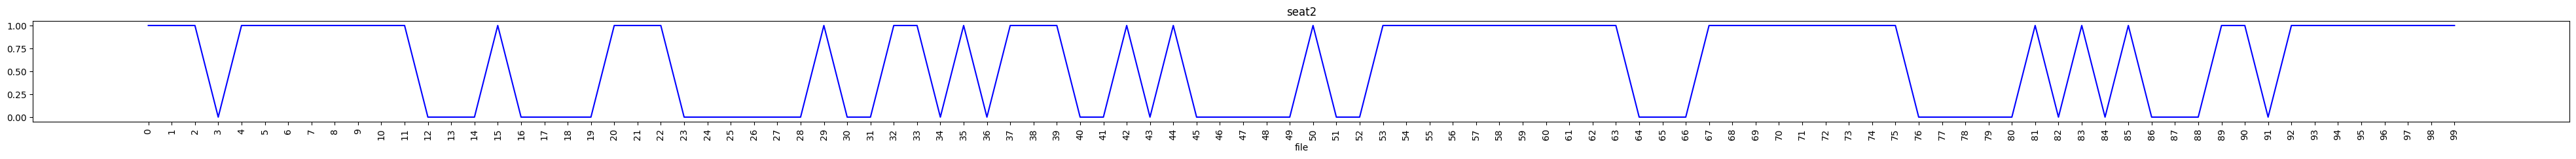

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(50,2))


plt.plot(a['Unnamed: 0'], a['category'], color='b')
plt.xlabel('file') # 設定x軸標題
plt.xticks(a['Unnamed: 0'], rotation='vertical') # 設定x軸label以及垂直顯示
plt.title('seat2') # 設定圖表標題
plt.show()





# 0717全部資料清洗

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
seat1 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat1_txt.csv")
seat2 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat2_txt.csv")
seat3 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat3_txt.csv")
seat4 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/0625_log/seat4_txt.csv")

cnn1 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/cnn1.csv")
cnn2 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/cnn2.csv")
cnn3 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/cnn3.csv")
cnn4 = pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0617_CNN/cnn4.csv")


In [ ]:
seat4['file'] = seat4['file'].str.split('_StreamVideoTrace').str[0]
seat4=seat4.reset_index(drop=True)
seat4

In [ ]:
cnn4['file'] = cnn4['file'].str.split('.jpg').str[0]
cnn4=cnn4.reset_index(drop=True)
cnn4

,Unnamed: 0,file,category
0,0,Engine_Evolution_2022_(1871990)_11-01-22_03-14-16,1
1,1,Engine_Evolution_2022_(1871990)_11-01-22_03-14-26,1
2,2,Engine_Evolution_2022_(1871990)_11-01-22_03-14-43,1
3,3,Engine_Evolution_2022_(1871990)_11-01-22_03-14-53,1
4,4,Engine_Evolution_2022_(1871990)_11-01-22_03-15-03,1
...,...,...,...
5330,5330,Engine_Evolution_2022_(1871990)_11-16-22_09-57-53,0
5331,5331,Engine_Evolution_2022_(1871990)_11-16-22_09-58-05,1
5332,5332,Engine_Evolution_2022_(1871990)_11-16-22_09-58-13,0
5333,5333,Engine_Evolution_2022_(1871990)_11-16-22_09-58-23,0


In [ ]:
seat4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2784 non-null   int64  
 1   user                 2784 non-null   object 
 2   file                 2784 non-null   object 
 3   Avg.ping Time        2784 non-null   float64
 4   st.Dev.ping Time     2783 non-null   float64
 5   Avg.serverBW         2784 non-null   float64
 6   St.Dev.serverBW      2783 non-null   float64
 7   Avg.clientBW         2784 non-null   float64
 8   St.Dev.clientBW      2783 non-null   float64
 9   Avg.linkBW           2784 non-null   float64
 10  St.Dev.linkBW        2783 non-null   float64
 11  Avg.packetloss       2784 non-null   float64
 12  St.Dev.packetloss    2783 non-null   float64
 13  Avg.FrameAge         2784 non-null   float64
 14  st.Dev.FrameAge      2783 non-null   float64
 15  Avg.FrameSize        2784 non-null   f

In [ ]:
cnn4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335 entries, 0 to 5334
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5335 non-null   int64 
 1   file        5335 non-null   object
 2   category    5335 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 125.2+ KB


In [ ]:
log_cnn4=pd.merge(seat4,cnn4, on='file')
log_cnn4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 0 to 2783
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0_x         2784 non-null   int64  
 1   user                 2784 non-null   object 
 2   file                 2784 non-null   object 
 3   Avg.ping Time        2784 non-null   float64
 4   st.Dev.ping Time     2783 non-null   float64
 5   Avg.serverBW         2784 non-null   float64
 6   St.Dev.serverBW      2783 non-null   float64
 7   Avg.clientBW         2784 non-null   float64
 8   St.Dev.clientBW      2783 non-null   float64
 9   Avg.linkBW           2784 non-null   float64
 10  St.Dev.linkBW        2783 non-null   float64
 11  Avg.packetloss       2784 non-null   float64
 12  St.Dev.packetloss    2783 non-null   float64
 13  Avg.FrameAge         2784 non-null   float64
 14  st.Dev.FrameAge      2783 non-null   float64
 15  Avg.FrameSize        2784 non-null   f

In [ ]:
log_cnn4.to_csv('log_cnn4.csv')

# 0718切分十回合

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
log_cnn1=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0717log+cnn/log_cnn1.csv")
log_cnn2=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0717log+cnn/log_cnn2.csv")
log_cnn3=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0717log+cnn/log_cnn3.csv")
log_cnn4=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0717log+cnn/log_cnn4.csv")

In [ ]:
#單一個人分十回合
mos=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/expand_mos.csv")
# user = mos[mos['username'].isin(['許人婕'])]
# user

In [ ]:
#single argmin （自己寫的）
#0:Graphic 1:Interactive	2:SelfAssessment 3:Opinion	4:latency	5:packet_loss	5:bandwidth
import numpy as np
import pandas as pd
round=[]
result = pd.DataFrame()
col=['latency','packet_loss','bandwidth']

for user in seat3.user.unique():
  if user != '許人婕':
    continue
  parameters=mos[mos.username==user]
  for setting in parameters.values:
    param=np.array(setting[-3:])
    # print(param)
    if sum(param)==0:
      continue
    if col[np.where(param>0)[0][0]]=='latency':
      #相差取平方
      a = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.ping Time']-param.sum(),2))]
      a = pd.concat([a, pd.Series(np.array(setting[-7:]))])
      a=a.T
      result = result.append(a, ignore_index=True)


    elif col[np.where(param>0)[0][0]]=='packet_loss':
      b = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.packetloss']-param.sum(),2))]
      b = pd.concat([b, pd.Series(np.array(setting[-7:]))])
      b=b.T
      result = result.append(b, ignore_index=True)


    elif col[np.where(param>0)[0][0]]=='bandwidth':
      c = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.serverBW']-param.sum(),2))]
      c = pd.concat([c, pd.Series(np.array(setting[-7:]))])
      c=c.T
      result = result.append(c, ignore_index=True)



result



<ipython-input-94-4186bac0cd6c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(c, ignore_index=True)
<ipython-input-94-4186bac0cd6c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(b, ignore_index=True)
<ipython-input-94-4186bac0cd6c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(a, ignore_index=True)
<ipython-input-94-4186bac0cd6c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(c, ignore_index=True)
<ipython-input-94-4186bac0cd6c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

,Unnamed: 0,user,file,Avg.ping Time,st.Dev.ping Time,Avg.serverBW,St.Dev.serverBW,Avg.clientBW,St.Dev.clientBW,Avg.linkBW,...,st.Dev.UploadTime,Avg.CompleteTime,st.Dev.CompleteTime,0,1,2,3,4,5,6
0,534,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-06...,52.125,9.491,1659.481,1908.571,2854.519,1936.614,8900.593,...,0.320,6.133,3.554,1,5,3,4,0,0,1920
1,573,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-18...,6.340,2.542,15690.400,411.985,2287.057,2055.805,6899.943,...,1.513,6.813,6.535,6,2,6,4,0,20,0
2,579,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-21...,206.424,0.330,4075.885,2980.053,2635.038,1823.689,18246.000,...,0.191,10.570,6.804,2,1,1,1,200,0,0
3,606,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-31...,25.348,32.374,2476.500,3188.876,749.966,989.643,65412.000,...,0.256,13.692,22.048,6,6,5,6,0,0,2560
4,597,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-27...,4.131,0.965,11285.345,823.663,112.673,31.349,10353.800,...,1.112,10.293,6.904,3,4,4,5,0,15,0
5,573,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-18...,6.340,2.542,15690.400,411.985,2287.057,2055.805,6899.943,...,1.513,6.813,6.535,2,4,6,5,0,0,32000
6,633,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-38...,107.508,1.372,8291.556,697.100,2102.333,1855.308,73783.000,...,0.814,6.657,6.392,3,1,1,2,100,0,0
7,570,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-18...,3.765,0.109,13452.321,1028.932,142.214,16.204,6997.107,...,1.420,7.385,7.363,6,1,2,4,0,25,0
8,606,許人婕,Engine_Evolution_2022_(1871990)_11-04-22_03-31...,25.348,32.374,2476.500,3188.876,749.966,989.643,65412.000,...,0.256,13.692,22.048,2,6,6,5,30,0,0


In [ ]:
a=log3_game
a

In [ ]:
log_cnn4 = log_cnn4.drop(labels=['Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y'],axis='columns') #刪除欄位
log_cnn4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user                 2784 non-null   object 
 1   file                 2784 non-null   object 
 2   Avg.ping Time        2784 non-null   float64
 3   st.Dev.ping Time     2783 non-null   float64
 4   Avg.serverBW         2784 non-null   float64
 5   St.Dev.serverBW      2783 non-null   float64
 6   Avg.clientBW         2784 non-null   float64
 7   St.Dev.clientBW      2783 non-null   float64
 8   Avg.linkBW           2784 non-null   float64
 9   St.Dev.linkBW        2783 non-null   float64
 10  Avg.packetloss       2784 non-null   float64
 11  St.Dev.packetloss    2783 non-null   float64
 12  Avg.FrameAge         2784 non-null   float64
 13  st.Dev.FrameAge      2783 non-null   float64
 14  Avg.FrameSize        2784 non-null   float64
 15  st.Dev.FrameSize     2783 non-null   f

In [ ]:
log1_game=log_cnn1[log_cnn1['category']==0]
log2_game=log_cnn2[log_cnn2['category']==0]
log3_game=log_cnn3[log_cnn3['category']==0]
log4_game=log_cnn4[log_cnn4['category']==0]

In [ ]:
#選出frame>60且分十回合argmin
import pandas as pd
import numpy as np

w = 0
output = pd.DataFrame()
col = ['latency', 'packet_loss', 'bandwidth']

for i in range(0, 21):
    name = log4_game.user.unique()[i]
    user = log4_game[log4_game['user'].isin([name])]

    if len(user) > 60:
        for user in log4_game.user.unique():
            # if user != '許人婕':
            #     continue

            parameters = mos[mos.username == user]

            for setting in parameters.values:
                param = np.array(setting[-3:])

                if sum(param) == 0:
                    continue

                if col[np.where(param > 0)[0][0]] == 'latency':
                    ping = log4_game[log4_game.user == user].iloc[np.argmin(np.power(log4_game[log4_game.user == user]['Avg.ping Time'] - param.sum(), 2))]
                    ping = pd.concat([ping, pd.Series(np.array(setting[-7:]))])
                    ping=ping.T
                    output = output.append(ping, ignore_index=True)

                elif col[np.where(param > 0)[0][0]] == 'packet_loss':
                    packetloss = log4_game[log4_game.user == user].iloc[np.argmin(np.power(log4_game[log4_game.user == user]['Avg.packetloss'] - param.sum(), 2))]
                    packetloss = pd.concat([packetloss, pd.Series(np.array(setting[-7:]))])
                    packetloss=packetloss.T
                    output = output.append(packetloss, ignore_index=True)

                elif col[np.where(param > 0)[0][0]] == 'bandwidth':
                    serverBW = log4_game[log4_game.user == user].iloc[np.argmin(np.power(log4_game[log4_game.user == user]['Avg.serverBW'] - param.sum(), 2))]
                    serverBW = pd.concat([serverBW, pd.Series(np.array(setting[-7:]))])
                    serverBW=serverBW.T
                    output = output.append(serverBW, ignore_index=True)

output = output.drop_duplicates()




output




In [ ]:
output.to_csv('CNNLOGMOS4.csv')

In [ ]:
CNNLOGMOS1=pd.read_csv("/content/CNNLOGMOS1.csv")
CNNLOGMOS2=pd.read_csv("/content/CNNLOGMOS2.csv")
CNNLOGMOS3=pd.read_csv("/content/CNNLOGMOS3.csv")
CNNLOGMOS4=pd.read_csv("/content/CNNLOGMOS4.csv")

In [ ]:
# CNNLOGMOS1.info()
# CNNLOGMOS2.info()
# CNNLOGMOS3.info()
# CNNLOGMOS4.info()
(99+198+153+189)/9


71.0

In [ ]:
result = pd.concat([CNNLOGMOS1, CNNLOGMOS2, CNNLOGMOS3,CNNLOGMOS4], axis =0)
result

In [ ]:
result.to_csv('CNNLOGMOSALL.csv')

In [ ]:
#相關性分析
argmin = pd.read_csv('/content/CNNLOGMOSALL.csv')
argmin = argmin.drop(labels=['Unnamed: 0.1','Unnamed: 0','category'],axis='columns') #刪除欄位
argmin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user                 639 non-null    object 
 1   file                 639 non-null    object 
 2   Avg.ping Time        639 non-null    float64
 3   st.Dev.ping Time     639 non-null    float64
 4   Avg.serverBW         639 non-null    float64
 5   St.Dev.serverBW      639 non-null    float64
 6   Avg.clientBW         639 non-null    float64
 7   St.Dev.clientBW      639 non-null    float64
 8   Avg.linkBW           639 non-null    float64
 9   St.Dev.linkBW        639 non-null    float64
 10  Avg.packetloss       639 non-null    float64
 11  St.Dev.packetloss    639 non-null    float64
 12  Avg.FrameAge         639 non-null    float64
 13  st.Dev.FrameAge      639 non-null    float64
 14  Avg.FrameSize        639 non-null    float64
 15  st.Dev.FrameSize     639 non-null    flo

In [ ]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1030 non-null   int64 
 1   time            1030 non-null   object
 2   position        1030 non-null   int64 
 3   username        1030 non-null   object
 4   round           1030 non-null   int64 
 5   Status          1030 non-null   object
 6   Graphic         1030 non-null   int64 
 7   Interactive     1030 non-null   int64 
 8   SelfAssessment  1030 non-null   int64 
 9   Opinion         1030 non-null   int64 
 10  latency         1030 non-null   int64 
 11  packet_loss     1030 non-null   int64 
 12  bandwidth       1030 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 104.7+ KB


In [ ]:
CNNLOGMOSALL=argmin.rename(columns={'0': 'Graphic','1': 'Interactive','2': 'SelfAssessment','3': 'Opinion','4': 'latency','5': 'packet_loss','6': 'bandwidth'}) #修改欄位名稱
CNNLOGMOSALL

In [ ]:
CNNLOGMOSALL.to_csv('CNNLOGMOSALL2.csv')

<ipython-input-65-134499088ee5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=CNNLOGMOSALL.corr()


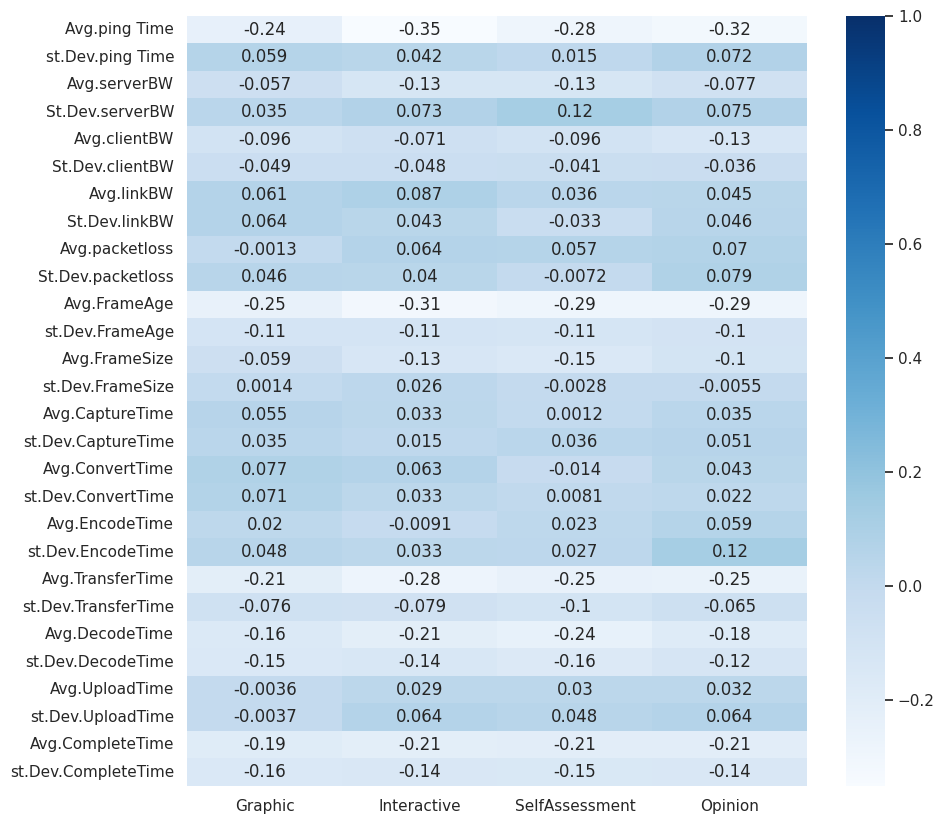

In [ ]:
import seaborn as sns
a=CNNLOGMOSALL.corr()
b=a.iloc[0:28,28:32]
sns.set(context="notebook",style="whitegrid",palette="dark")
plt.subplots(figsize=(10,10)) #設置長寬尺吋大小
c1 = sns.heatmap(b, annot = True, vmax = 1,cmap="Blues")

In [ ]:
cor=CNNLOGMOSALL.corr()
# 28/32
b=abs(cor.iloc[0:28,29:30])
Interactive=b.nlargest(4,'Interactive')
Interactive

<ipython-input-132-a80fba3074a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=CNNLOGMOSALL.corr()


,Interactive
Avg.ping Time,0.351049
Avg.FrameAge,0.311961
Avg.TransferTime,0.281368
Avg.CompleteTime,0.212987


In [ ]:
b=abs(cor.iloc[0:28,28:29])
Graphic=b.nlargest(4,'Graphic')
Graphic

,Graphic
Avg.FrameAge,0.249242
Avg.ping Time,0.236675
Avg.TransferTime,0.211329
Avg.CompleteTime,0.187811


In [ ]:
b=abs(cor.iloc[0:28,30:31])
SelfAssessment=b.nlargest(4,'SelfAssessment')
SelfAssessment

,SelfAssessment
Avg.FrameAge,0.292461
Avg.ping Time,0.284060
Avg.TransferTime,0.250418
Avg.DecodeTime,0.244818


In [ ]:
b=abs(cor.iloc[0:28,31:32])
Opinion=b.nlargest(4,'Opinion')
Opinion

,Opinion
Avg.ping Time,0.317799
Avg.FrameAge,0.289314
Avg.TransferTime,0.253846
Avg.CompleteTime,0.207192


In [ ]:
seat_df = pd.concat(seat_df_list,ignore_index=True)

In [ ]:
CNNLOGMOSALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user                 639 non-null    object 
 1   file                 639 non-null    object 
 2   Avg.ping Time        639 non-null    float64
 3   st.Dev.ping Time     639 non-null    float64
 4   Avg.serverBW         639 non-null    float64
 5   St.Dev.serverBW      639 non-null    float64
 6   Avg.clientBW         639 non-null    float64
 7   St.Dev.clientBW      639 non-null    float64
 8   Avg.linkBW           639 non-null    float64
 9   St.Dev.linkBW        639 non-null    float64
 10  Avg.packetloss       639 non-null    float64
 11  St.Dev.packetloss    639 non-null    float64
 12  Avg.FrameAge         639 non-null    float64
 13  st.Dev.FrameAge      639 non-null    float64
 14  Avg.FrameSize        639 non-null    float64
 15  st.Dev.FrameSize     639 non-null    flo

In [ ]:
X=CNNLOGMOSALL.iloc[:,2:30]
y =CNNLOGMOSALL.iloc[:,31:34]
y


,Interactive,SelfAssessment,Opinion
0,3,5,3
1,1,1,1
2,2,4,2
3,3,4,3
4,1,1,1
...,...,...,...
634,6,5,5
635,2,2,2
636,5,3,4
637,3,3,4


In [ ]:
import xgboost
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_squared_error,explained_variance_score


# Step 1: 讀取CSV檔案
# data = pd.read_csv('/content/pseudo0514.csv')


# Step 2: 資料前處理（如果需要的話）
# 處理缺失值、特徵縮放、類別特徵編碼等

# Step 3: 資料拆分為訓練集和測試集
X = CNNLOGMOSALL.iloc[:,2:30]  # 特徵列
y = CNNLOGMOSALL.iloc[:,31:34] # 目標變數

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: 模型建立
model = XGBRegressor()

# Step 5: 模型訓練
model.fit(X_train, y_train)

# Step 6: 模型預測
y_pred = model.predict(X_test)

# Step 7: 模型評估
#（MAE、MSE、RMSE）越小越好
#R2 Score、Explained Variance Score越接近1越好

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

print('Mean Squared Error (MSE):', mse)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

print('R-squared (R2) Score:', r2)


evs = explained_variance_score(y_test, y_pred)
print('Explained Variance Score:', evs)

Mean Absolute Error (MAE): 1.3462597546167672
Mean Squared Error (MSE): 2.8335778173334916
Root Mean Squared Error (RMSE): 1.6833234440634075
R-squared (R2) Score: -0.23279524179098976
Explained Variance Score: -0.22127903849435185


## practice


In [ ]:
#single argmin
#0:Graphic 1:Interactive	2:SelfAssessment 3:Opinion	4:latency	5:packet_loss	5:bandwidth
import numpy as np
import pandas as pd
round=[]
result = pd.DataFrame()
col=['latency','packet_loss','bandwidth']

for user in seat3.user.unique():
  if user != '許人婕':
    continue
  parameters=mos[mos.username==user]
  for setting in parameters.values:
    param=np.array(setting[-3:])
    # print(param)
    if sum(param)==0:
      continue
    if col[np.where(param>0)[0][0]]=='latency':
      # np.argmin(np.power(seat3[seat3.user==user]['Avg.pingTime']-param.sum(),2))
      # print(seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.pingTime']-param.sum(),2))])
      #相差取平方
      a = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.ping Time']-param.sum(),2))]
      a = pd.concat([a, pd.Series(np.array(setting[-7:]))])

      # s3= ping.T
    elif col[np.where(param>0)[0][0]]=='packet_loss':
      # print(seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.packetloss']-param.sum(),2))])
      b = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.packetloss']-param.sum(),2))]
      b = pd.concat([b, pd.Series(np.array(setting[-7:]))])
      # print(b)

    elif col[np.where(param>0)[0][0]]=='bandwidth':
      # print(seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.serverBW']-param.sum(),2))])
      c = seat3[seat3.user==user].iloc[np.argmin(np.power(seat3[seat3.user==user]['Avg.serverBW']-param.sum(),2))]
      c = pd.concat([c, pd.Series(np.array(setting[-7:]))])
      # print(c)
    output = pd.concat([a, b, c], axis =1)
    d = output.T

    result = result.append(d)
result = result.drop_duplicates()

result

In [ ]:
data = pd.read_excel('/content/new-NEW_DATA_ANALYSIS(2018-02-02 18-15-34).xls')
data.iloc[:5,57:63]

,INSTAN_DOWNLOAD_SPEED,USER_SCORE,USER_NAME,USER_TEL,ELOADING,ESTALLING
0,1,1,2,2639491,4148,3
1,1,2,2,2639491,4148,4
2,1,2,1,2639491,4148,3
3,2,1,1,2639491,4148,4
4,2,2,2,2639491,4148,2


# 0728

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
CNNLOGMOS=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0718CNNLOGMOS/CNNLOGMOSALL2.csv")


In [ ]:
CNNLOGMOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           639 non-null    int64  
 1   user                 639 non-null    object 
 2   file                 639 non-null    object 
 3   Avg.ping Time        639 non-null    float64
 4   st.Dev.ping Time     639 non-null    float64
 5   Avg.serverBW         639 non-null    float64
 6   St.Dev.serverBW      639 non-null    float64
 7   Avg.clientBW         639 non-null    float64
 8   St.Dev.clientBW      639 non-null    float64
 9   Avg.linkBW           639 non-null    float64
 10  St.Dev.linkBW        639 non-null    float64
 11  Avg.packetloss       639 non-null    float64
 12  St.Dev.packetloss    639 non-null    float64
 13  Avg.FrameAge         639 non-null    float64
 14  st.Dev.FrameAge      639 non-null    float64
 15  Avg.FrameSize        639 non-null    flo

In [ ]:
Graphic=CNNLOGMOS[['Avg.ping Time','Avg.FrameAge','Avg.TransferTime','Avg.CompleteTime','Graphic']]
Interactive =CNNLOGMOS[['Avg.ping Time','Avg.FrameAge','Avg.TransferTime','Avg.CompleteTime','Interactive']]
SelfAssessment =CNNLOGMOS[['Avg.ping Time','Avg.FrameAge','Avg.TransferTime','Avg.DecodeTime','SelfAssessment']]
Opinion =CNNLOGMOS[['Avg.ping Time','Avg.FrameAge','Avg.TransferTime','Avg.CompleteTime','Opinion']]


,Avg.ping Time,Avg.FrameAge,Avg.TransferTime,Avg.CompleteTime,Graphic
0,3.955,55.880,7.574,33.648,4
1,4.314,20.873,3.752,7.343,3
2,36.322,47.412,25.543,8.188,4
3,3.955,55.880,7.574,33.648,4
4,36.322,47.412,25.543,8.188,2
...,...,...,...,...,...
634,207.610,34.810,8.722,11.515,6
635,4.199,50.347,11.674,9.840,3
636,4.379,56.731,28.873,9.578,5
637,5.253,87.007,42.938,23.698,4


In [ ]:
import xgboost
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = Graphic.iloc[:,0:4]  # 特徵列
X


,Avg.ping Time,Avg.FrameAge,Avg.TransferTime,Avg.CompleteTime
0,3.955,55.880,7.574,33.648
1,4.314,20.873,3.752,7.343
2,36.322,47.412,25.543,8.188
3,3.955,55.880,7.574,33.648
4,36.322,47.412,25.543,8.188
...,...,...,...,...
634,207.610,34.810,8.722,11.515
635,4.199,50.347,11.674,9.840
636,4.379,56.731,28.873,9.578
637,5.253,87.007,42.938,23.698


In [ ]:
CNNLOGMOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           639 non-null    int64  
 1   user                 639 non-null    object 
 2   file                 639 non-null    object 
 3   Avg.ping Time        639 non-null    float64
 4   st.Dev.ping Time     639 non-null    float64
 5   Avg.serverBW         639 non-null    float64
 6   St.Dev.serverBW      639 non-null    float64
 7   Avg.clientBW         639 non-null    float64
 8   St.Dev.clientBW      639 non-null    float64
 9   Avg.linkBW           639 non-null    float64
 10  St.Dev.linkBW        639 non-null    float64
 11  Avg.packetloss       639 non-null    float64
 12  St.Dev.packetloss    639 non-null    float64
 13  Avg.FrameAge         639 non-null    float64
 14  st.Dev.FrameAge      639 non-null    float64
 15  Avg.FrameSize        639 non-null    flo

<ipython-input-33-a789cfe5a368>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s=CNNLOGMOS.corr(method='spearman')


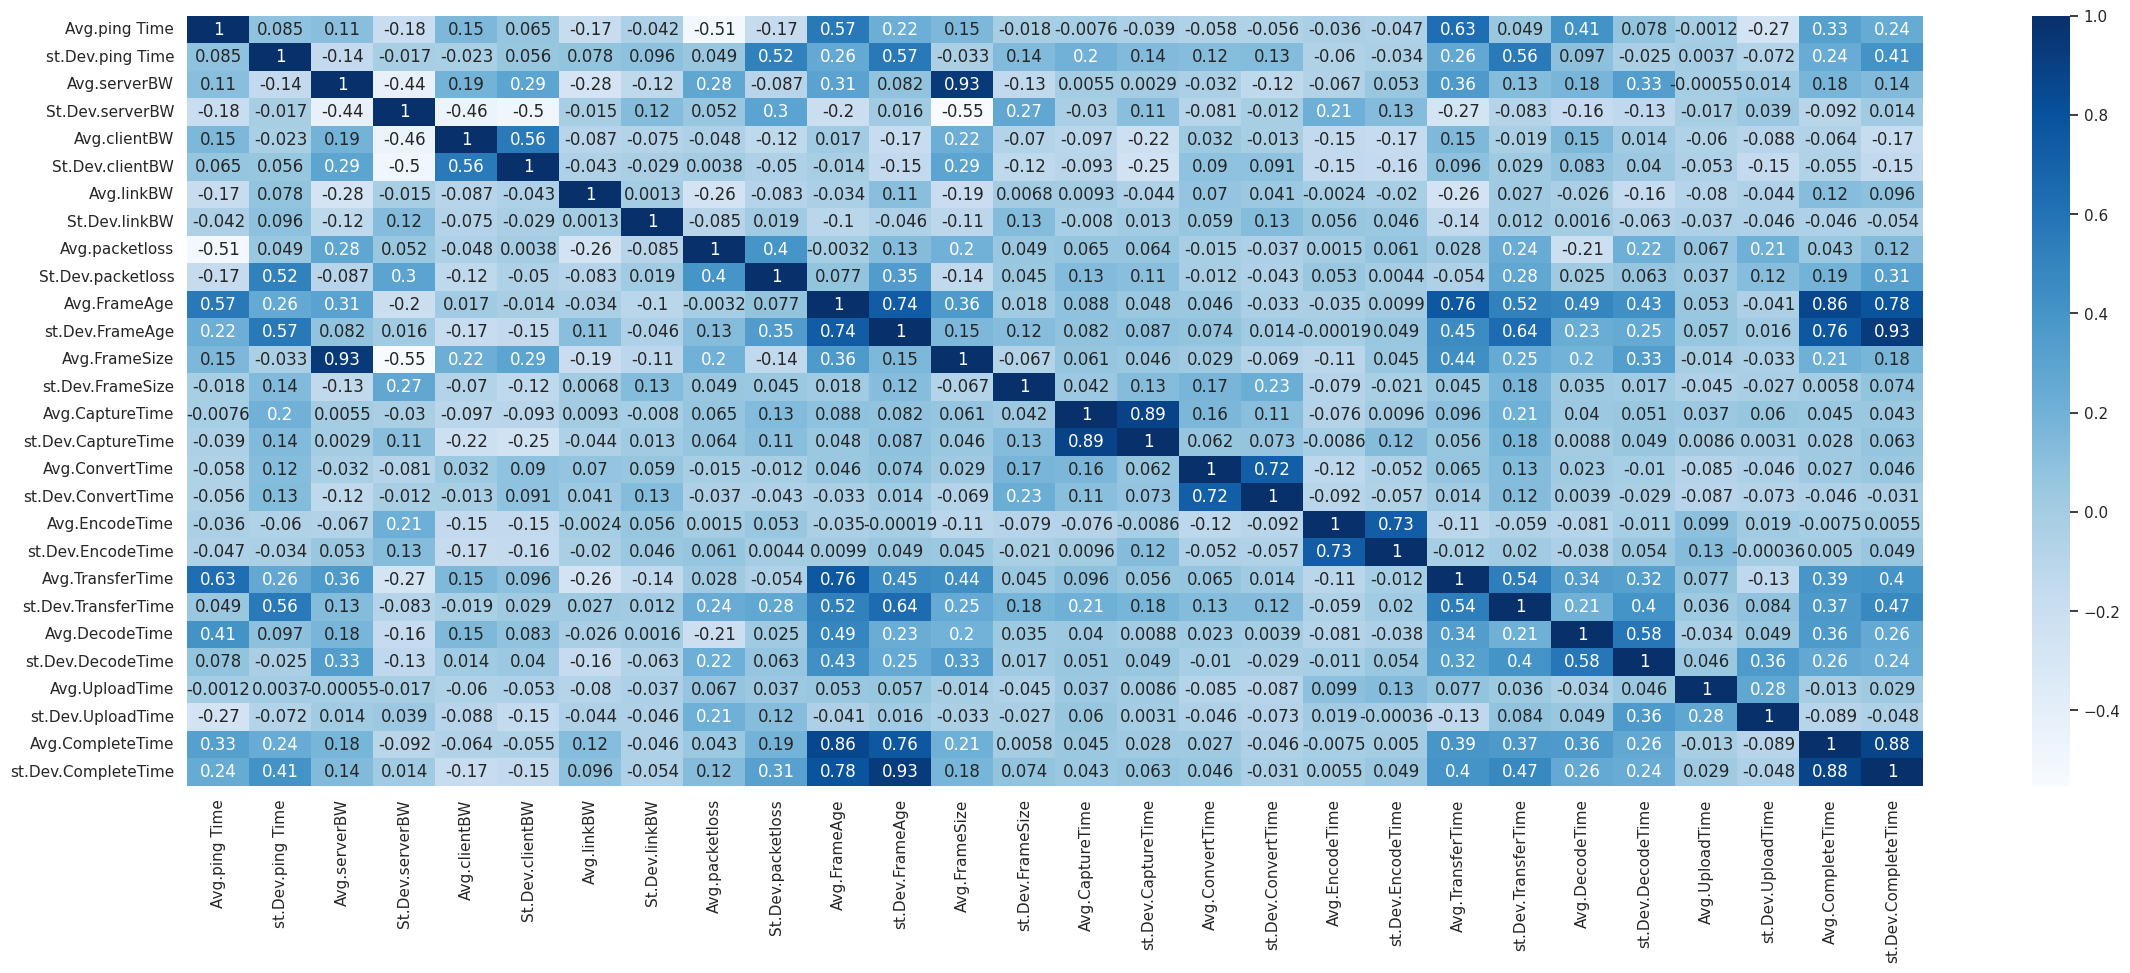

In [ ]:
#spearman
import seaborn as sns
s=CNNLOGMOS.corr(method='spearman')
# b=a.iloc[1:29,29:33]
b=a.iloc[1:29,1:29]

sns.set(context="notebook",style="whitegrid",palette="dark")
plt.subplots(figsize=(28,10)) #設置長寬尺吋大小

c1 = sns.heatmap(b, annot = True, vmax = 1,cmap="Blues")


,Unnamed: 0,Avg.ping Time,st.Dev.ping Time,Avg.serverBW,St.Dev.serverBW,Avg.clientBW,St.Dev.clientBW,Avg.linkBW,St.Dev.linkBW,Avg.packetloss,...,st.Dev.UploadTime,Avg.CompleteTime,st.Dev.CompleteTime,Graphic,Interactive,SelfAssessment,Opinion,latency,packet_loss,bandwidth
Avg.FrameAge,-0.024637,0.349541,-0.004788,0.368226,-0.200268,-0.013818,-0.184857,-0.228467,-0.286398,0.293116,...,0.087798,0.639499,0.59795,-0.237486,-0.273827,-0.278714,-0.258981,0.376881,0.076724,-0.289924


<ipython-input-31-33e11fe0c66e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=CNNLOGMOS.corr()


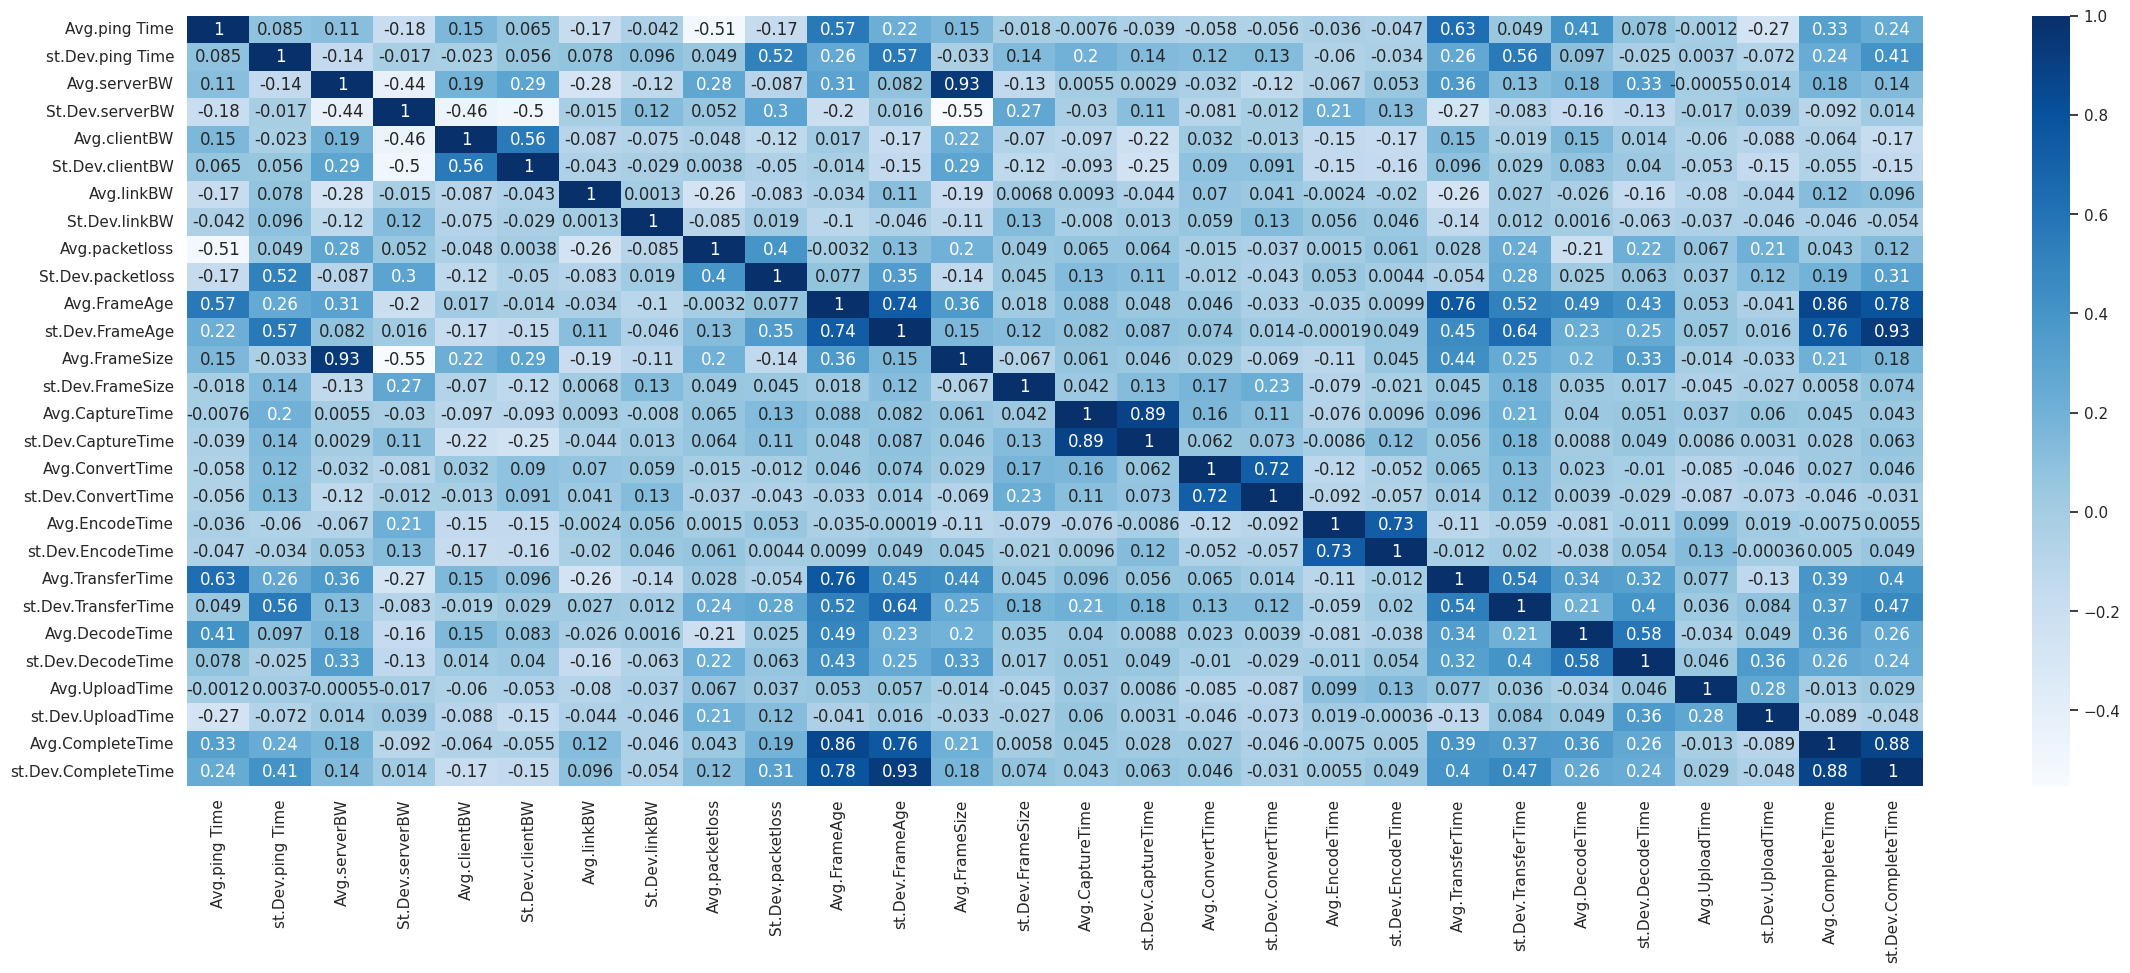

In [ ]:

import seaborn as sns
a=CNNLOGMOS.corr()
# b=a.iloc[1:29,29:33]
b=a.iloc[1:29,1:29]
sns.set(context="notebook",style="whitegrid",palette="dark")
plt.subplots(figsize=(28,10)) #設置長寬尺吋大小
c1 = sns.heatmap(b, annot = True, vmax = 1,cmap="Blues")

In [ ]:
b=a.iloc[1:29,29:33]
b

,Graphic,Interactive,SelfAssessment,Opinion
Avg.ping Time,-0.149799,-0.227778,-0.198027,-0.218196
st.Dev.ping Time,0.007670,0.039718,0.000963,0.021707
Avg.serverBW,-0.045815,-0.080814,-0.105199,-0.043601
St.Dev.serverBW,0.077488,0.087124,0.160704,0.102216
Avg.clientBW,-0.087151,-0.082157,-0.096579,-0.119761
St.Dev.clientBW,-0.008052,0.021620,0.004728,0.031235
Avg.linkBW,0.087470,0.093070,0.030928,0.082890
St.Dev.linkBW,0.152184,0.171852,0.106764,0.189308
Avg.packetloss,-0.065810,-0.032381,-0.037545,-0.020585
St.Dev.packetloss,-0.018389,0.008793,-0.021610,0.027213


## 0805

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
CNNLOGMOS=pd.read_csv("/content/drive/MyDrive/cloud gaming QoE prediction/data/0718CNNLOGMOS/CNNLOGMOSALL2.csv")

In [ ]:
CNNLOGMOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           639 non-null    int64  
 1   user                 639 non-null    object 
 2   file                 639 non-null    object 
 3   Avg.ping Time        639 non-null    float64
 4   st.Dev.ping Time     639 non-null    float64
 5   Avg.serverBW         639 non-null    float64
 6   St.Dev.serverBW      639 non-null    float64
 7   Avg.clientBW         639 non-null    float64
 8   St.Dev.clientBW      639 non-null    float64
 9   Avg.linkBW           639 non-null    float64
 10  St.Dev.linkBW        639 non-null    float64
 11  Avg.packetloss       639 non-null    float64
 12  St.Dev.packetloss    639 non-null    float64
 13  Avg.FrameAge         639 non-null    float64
 14  st.Dev.FrameAge      639 non-null    float64
 15  Avg.FrameSize        639 non-null    flo

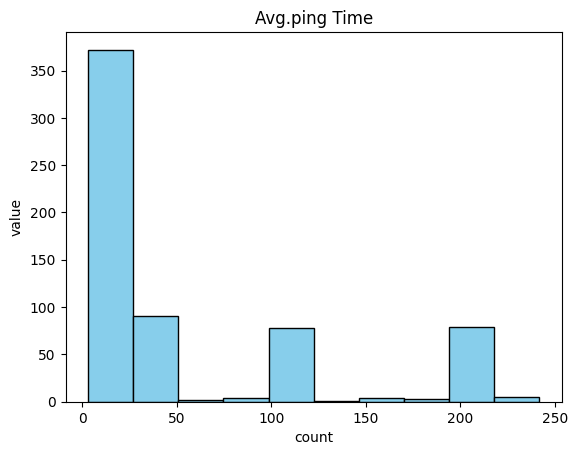

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 設定隨機種子，確保每次執行結果相同（可選步驟）
np.random.seed(42)

# 生成常態分佈的隨機數據
mean = 0  # 平均值
std = 1   # 標準差
size = 1000  # 隨機數據的個數
data2 = np.random.normal(loc=mean, scale=std, size=size)
data=CNNLOGMOS['Avg.ping Time']
# 繪製直方圖
# plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# 繪製常態分佈的概率密度函數（PDF）
# x = np.linspace(min(data), max(data), 100)
# pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
# plt.plot(x, pdf, color='red', linewidth=2)

# 設置標題和軸標籤
plt.title('Avg.ping Time')
plt.xlabel('count')
plt.ylabel('value')

# 顯示圖表
plt.show()


In [ ]:
import numpy as np

# 假设这是你的原始网络参数数据
original_data = [3.955, 7347.079, 1074.895, 55.88, 17428.158]

# 平移操作
translation_amount = 10
translated_data = [x + translation_amount for x in original_data]

# 缩放操作
scaling_factor = 0.8
scaled_data = [x * scaling_factor for x in original_data]

print("Original Data:", original_data)
print("Translated Data:", translated_data)
print("Scaled Data:", scaled_data)

Original Data: [3.955, 7347.079, 1074.895, 55.88, 17428.158]
Translated Data: [13.955, 7357.079, 1084.895, 65.88, 17438.158]
Scaled Data: [3.164, 5877.6632, 859.916, 44.70400000000001, 13942.5264]
